### comparing different models 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

In [2]:
# Load dataset
df = pd.read_csv('Dataset01-Employee_Attrition.csv')
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.drop_duplicates(inplace=True)

In [4]:
df = pd.concat([
    df.drop(columns=["Department", "salary"]),
    pd.get_dummies(df["Department"], prefix="Department", dtype=int),
    pd.get_dummies(df["salary"], prefix="Salary", dtype=int)
], axis=1)

In [5]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department_IT,Department_RandD,...,Department_hr,Department_management,Department_marketing,Department_product_mng,Department_sales,Department_support,Department_technical,Salary_high,Salary_low,Salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11996,0.74,0.95,5,266,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11997,0.85,0.54,3,185,10,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
11998,0.33,0.65,3,172,10,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [6]:
# Define features and target
X = df.drop("left", axis=1)
y = df["left"]

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:08:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


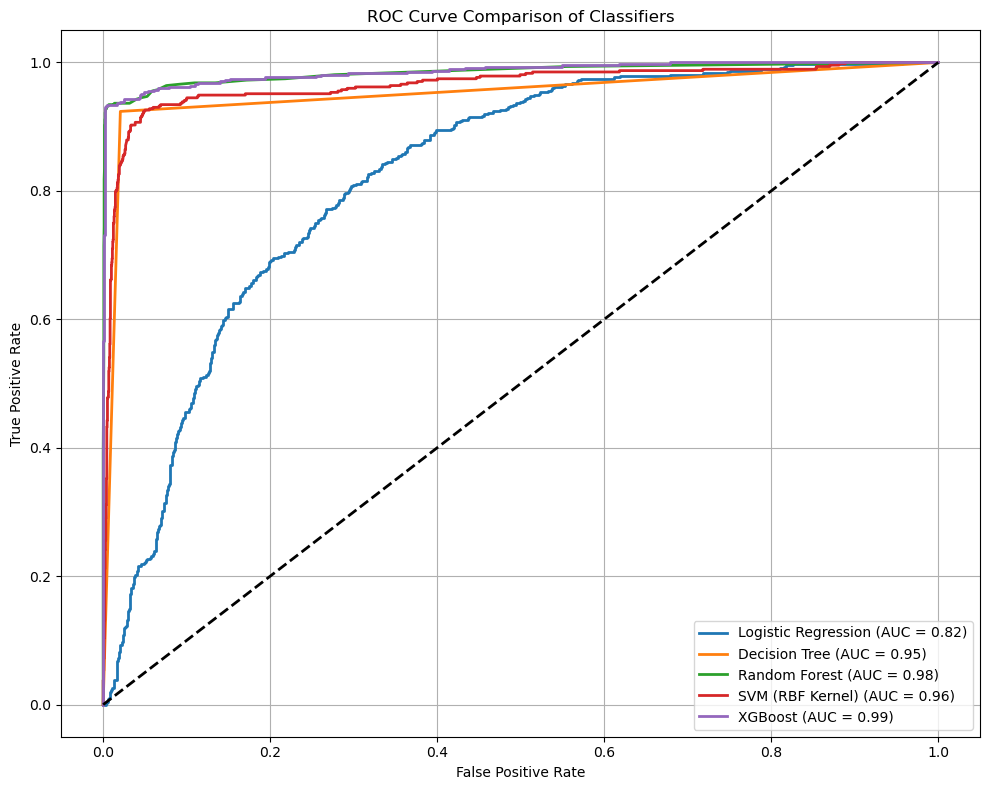

In [8]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVM (RBF Kernel)': SVC(probability=True, kernel='rbf', random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Plotting ROC Curve
plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:  # For SVM with no predict_proba
        y_proba = model.decision_function(X_test)

    # Calculate ROC
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    # Plot
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot baseline
plt.plot([0, 1], [0, 1], 'k--', lw=2)

# Final plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Classifiers')
plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.show()


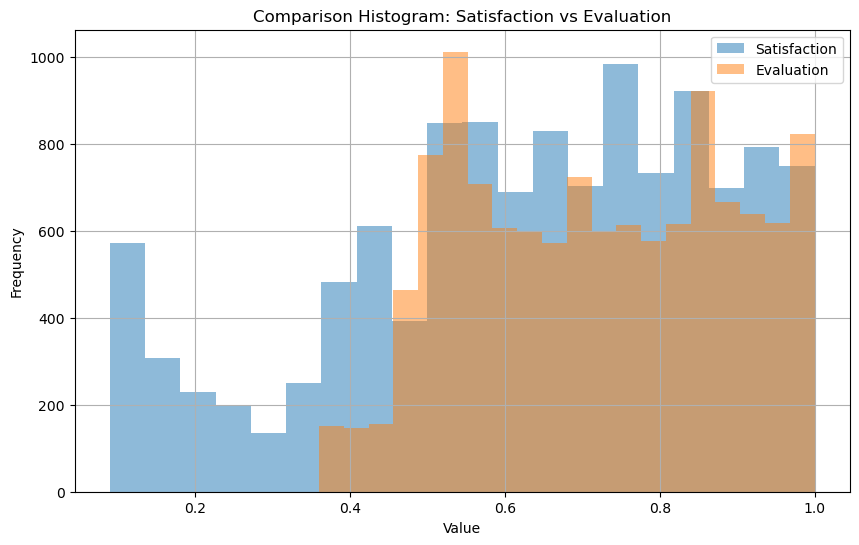

In [9]:
plt.figure(figsize=(10,6))
plt.hist(df['satisfaction_level'], bins=20, alpha=0.5, label='Satisfaction')
plt.hist(df['last_evaluation'], bins=20, alpha=0.5, label='Evaluation')
plt.title("Comparison Histogram: Satisfaction vs Evaluation")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.841561   0.492228  0.201271  0.285714
1        Decision Tree  0.970647   0.893443  0.923729  0.908333
2        Random Forest  0.985324   0.975556  0.930085  0.952278
3     SVM (RBF Kernel)  0.956971   0.843687  0.891949  0.867147
4              XGBoost  0.984656   0.967105  0.934322  0.950431


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [17:08:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


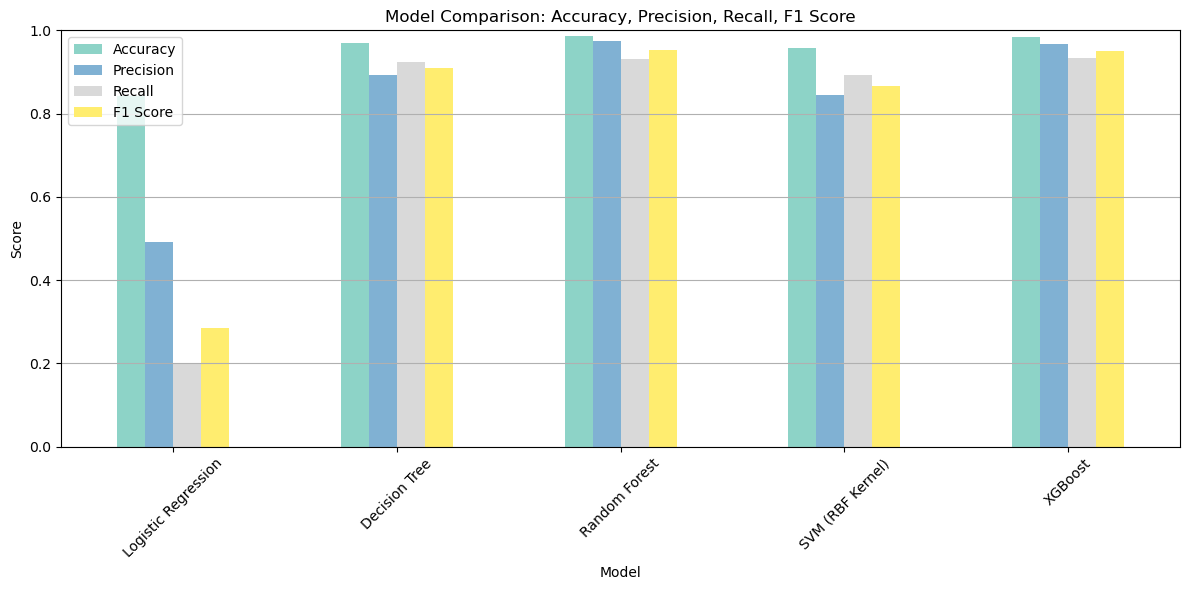

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pandas as pd

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=0),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=0),
    'SVM (RBF Kernel)': SVC(probability=True, kernel='rbf', random_state=0),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Empty list to collect metrics
results = []

# Loop through models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        'Model': name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1 Score': f1
    })

# Create DataFrame
metrics_df = pd.DataFrame(results)

# Print table
print(metrics_df)

# Optional: Visualize using bar plot
metrics_df.set_index('Model').plot(kind='bar', figsize=(12, 6), colormap='Set3')
plt.title('Model Comparison: Accuracy, Precision, Recall, F1 Score')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
